# Introducción a OpenCV para preprocesamiento de imágenes

In [1]:
import cv2
import numpy as np
print cv2.__version__
import matplotlib.pyplot as plt

plt.style.use(plt.style.available[2])

3.1.0


In [5]:
%matplotlib inline

#### Cómo abrir una imagen?

In [3]:
img = cv2.imread('images/hist.jpg', 0)

#### Cómo cambiar tamaño de imágenes?

(128, 128) (600, 1200)


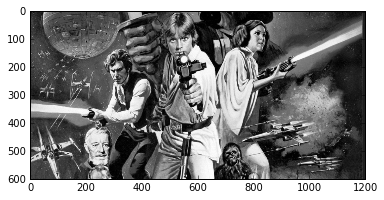

In [6]:
res = cv2.resize(img, (128, 128), interpolation = cv2.INTER_CUBIC)
print res.shape, img.shape
plt.imshow(img, cmap='gray')

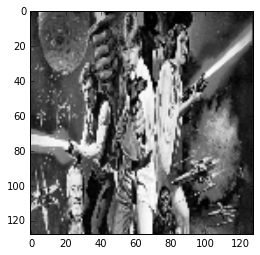

In [7]:
plt.imshow(res, cmap='gray')

#### Transformaciones sobre imágenes
##### Rotación

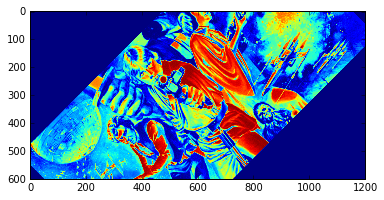

In [8]:
(rows, cols) = img.shape

M = cv2.getRotationMatrix2D((cols / 2,rows / 2), 45, 1)
dst = cv2.warpAffine(img, M,(cols, rows))

plt.imshow(dst)

#### Ecualización de Histogramas

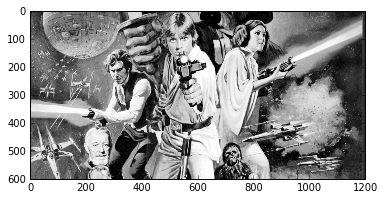

In [9]:
img = cv2.imread('images/hist.jpg', 0)
img_ = cv2.equalizeHist(img)
plt.imshow(img_, cmap='gray')

(0, 256)

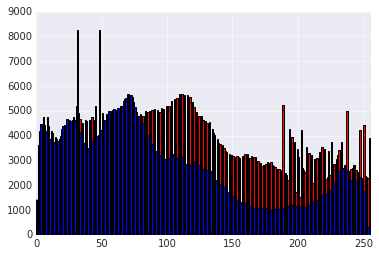

In [10]:
plt.style.use(plt.style.available[0])
hist = plt.hist(img_.ravel(), 256, [0, 256], color='r', label='equalize image')
hist = plt.hist(img.ravel(), 256, [0, 256], label='raw image')
plt.xlim(0, 256)

#### Cómo sacar imagenes de un video ?

In [11]:
def split_video(file_name, d_path):
    cap = cv2.VideoCapture(file_name)
    frames_count = cap.get(7)
    frame_rotated = cap.get(3) > cap.get(4)
    
    for frame_id in range(int(frames_count)):
        ret, frame = cap.read()
        if frame_id%2 == 0 and not frame_rotated:
            frame = np.rot90(frame, 3)
        
        cv2.imwrite("{}image-{}.jpg".format(d_path, str(frame_id)), frame)

In [12]:
split_video("data/videos/VID_20160812_193115.mp4", "/tmp/")